<a href="https://colab.research.google.com/github/jyw22/JSC270-final-project/blob/main/A4Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
import numpy as np
import seaborn as sns
import io
import pandas as pd
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import nltk
nltk.download('punkt')
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/ColabNotebooks/JSC270/A4"

 A4Part1.ipynb			   Corona_NLP_test.csv	     tweet_script.py
 A4Part2_draft.ipynb		   Corona_NLP_train.csv      tweets.csv
 A4Part2.ipynb			   Corona_NLP_train.gsheet   Untitled0.ipynb
'A4 Presentation Slides.gslides'   Part1_Model_output.gdoc


In [ ]:
# Importing data
train_raw = pd.read_csv("/content/drive/My Drive/ColabNotebooks/JSC270/A4/tweets.csv", sep = ',', encoding='latin1')

#Section 1: EDA


In [ ]:
# View dataset information
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   tweet_text             10000 non-null  object 
 2   tweet_favourite_count  10000 non-null  int64  
 3   tweet_created_at       10000 non-null  object 
 4   tweet_retweet_count    10000 non-null  int64  
 5   user_statuses_count    10000 non-null  int64  
 6   user_screen_name       10000 non-null  object 
 7   user_followers_count   10000 non-null  int64  
 8   log_retweet_count      10000 non-null  float64
 9   log_favourite_count    10000 non-null  float64
 10  log_followers_count    10000 non-null  float64
 11  popularity             10000 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 937.6+ KB


In [ ]:
train_raw.describe()

,Unnamed: 0,tweet_favourite_count,tweet_retweet_count,user_statuses_count,user_followers_count,log_retweet_count,log_favourite_count,log_followers_count,popularity
count,10000.00000,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,25.58930,7.449800,7.539797e+04,7752.491300,0.657881,1.195430,7.237223,0.129199
std,2886.89568,163.85507,46.872183,1.364393e+05,27802.219776,1.133834,1.489266,1.895981,1.082379
min,0.00000,0.00000,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,0.00000,0.000000,8.732000e+03,461.250000,0.000000,0.000000,6.136102,0.000000
50%,4999.50000,1.00000,0.000000,2.835600e+04,1348.000000,0.000000,0.693147,7.207119,0.006269
75%,7499.25000,5.00000,1.000000,6.686200e+04,4521.000000,0.693147,1.791759,8.416710,0.042143
max,9999.00000,4889.00000,1562.000000,1.041619e+06,755203.000000,7.354362,8.494948,13.534743,58.230088


In [ ]:
# Print summary statistics
train_raw[["tweet_retweet_count", "tweet_favourite_count", "user_followers_count", "log_retweet_count", "log_favourite_count", "log_followers_count", "popularity"]].describe()

,tweet_retweet_count,tweet_favourite_count,user_followers_count,log_retweet_count,log_favourite_count,log_followers_count,popularity
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.449800,25.58930,7752.491300,0.657881,1.195430,7.237223,0.129199
std,46.872183,163.85507,27802.219776,1.133834,1.489266,1.895981,1.082379
min,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,461.250000,0.000000,0.000000,6.136102,0.000000
50%,0.000000,1.00000,1348.000000,0.000000,0.693147,7.207119,0.006269
75%,1.000000,5.00000,4521.000000,0.693147,1.791759,8.416710,0.042143
max,1562.000000,4889.00000,755203.000000,7.354362,8.494948,13.534743,58.230088


In [ ]:
# Take a look at the first few data points
train_raw.head()

,Unnamed: 0,tweet_text,tweet_favourite_count,tweet_created_at,tweet_retweet_count,user_statuses_count,user_screen_name,user_followers_count,log_retweet_count,log_favourite_count,log_followers_count,popularity
0,0,The priority for the city should be on providi...,0,2023-03-27 21:01:36+00:00,0,10194,EmergencyAgent,1145,0.0,0.0,7.044033,0.0
1,1,"Like it or not, this kind of clip is the sort ...",0,2023-03-27 21:01:26+00:00,0,2843,EDenhoff,4630,0.0,0.0,8.440528,0.0
2,2,On a scale of moderately conservative (1) to r...,0,2023-03-27 21:01:16+00:00,0,13608,dzoolander85,11234,0.0,0.0,9.326789,0.0
3,3,Keep up with the latest politics with The Dail...,0,2023-03-27 21:01:06+00:00,0,3610,VassKapelosShow,4901,0.0,0.0,8.497399,0.0
4,4,So much resemblance to NAZI Germany leading up...,0,2023-03-27 21:01:05+00:00,0,108226,marshiehilgs,515,0.0,0.0,6.246107,0.0


In [ ]:
# Check whether there is any missing values
print("missing data: ")
print(train_raw.isna().any())

missing data: 
Unnamed: 0               False
tweet_text               False
tweet_favourite_count    False
tweet_created_at         False
tweet_retweet_count      False
user_statuses_count      False
user_screen_name         False
user_followers_count     False
dtype: bool


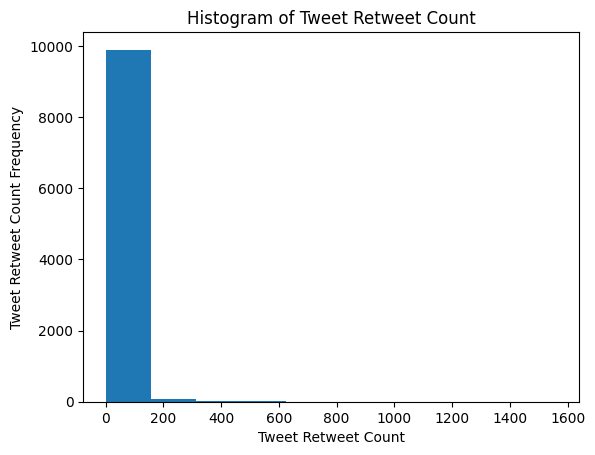

In [ ]:
# Plot histogram of tweet retweet count
plt.hist(train_raw.tweet_retweet_count, bins = 10)
plt.title('Histogram of Tweet Retweet Count')
plt.xlabel('Tweet Retweet Count')
plt.ylabel('Tweet Retweet Count Frequency')
plt.show()

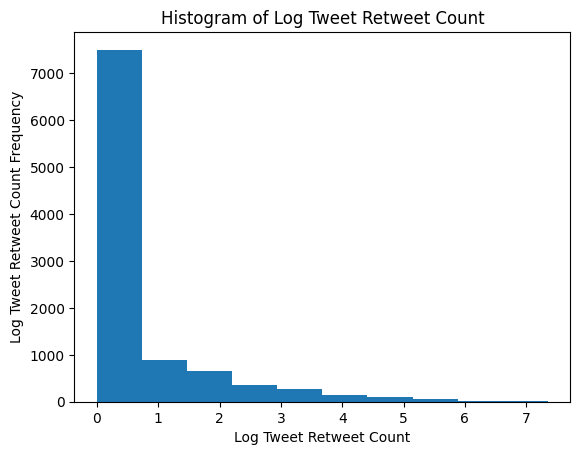

In [ ]:
# Since the histogram above is highly skewed, we take the log to better visualize
# the distribution
train_raw["log_retweet_count"] = np.log(train_raw.tweet_retweet_count+1)
# Plot histogram of log tweet retweet count
plt.hist(train_raw["log_retweet_count"], bins = 10)
plt.title('Histogram of Log Tweet Retweet Count')
plt.xlabel('Log Tweet Retweet Count')
plt.ylabel('Log Tweet Retweet Count Frequency')
plt.show()

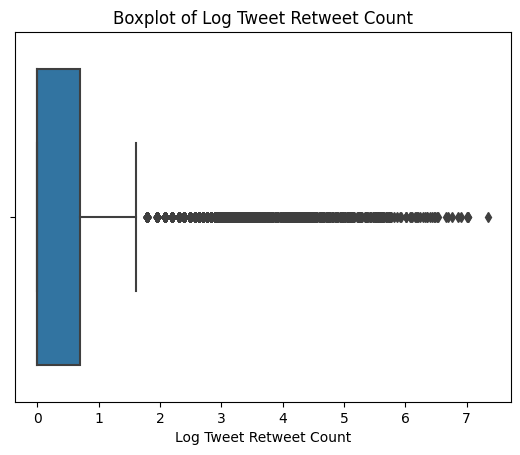

In [ ]:
# Plot the boxplot of log tweet retweet count
sns.boxplot(x = 'log_retweet_count', data = train_raw)
plt.xlabel('Log Tweet Retweet Count')
plt.title('Boxplot of Log Tweet Retweet Count')
plt.show()

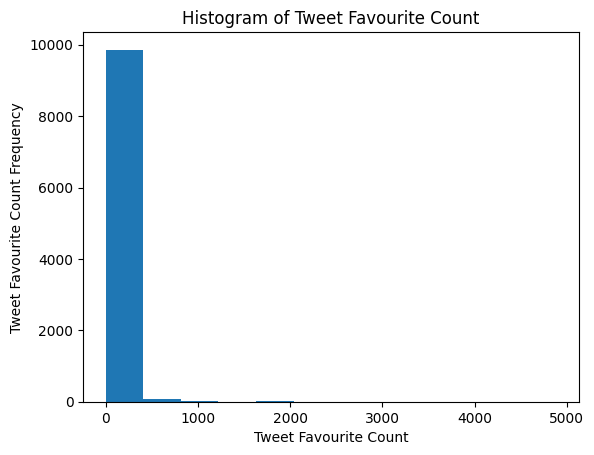

In [ ]:
# Plot histogram of tweet favourite count
plt.hist(train_raw.tweet_favourite_count, bins = 12)
plt.title('Histogram of Tweet Favourite Count')
plt.xlabel('Tweet Favourite Count')
plt.ylabel('Tweet Favourite Count Frequency')
plt.show()

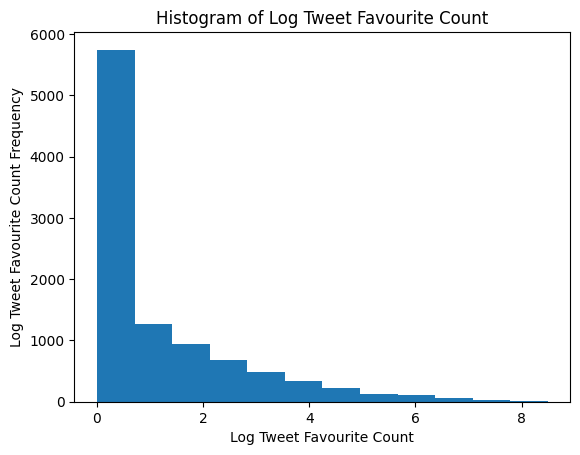

In [ ]:
# Since the histogram above is highly skewed, we take the log to better visualize
# the distribution
train_raw["log_favourite_count"] = np.log(train_raw.tweet_favourite_count+1)
# Plot histogram of log favourite count
plt.hist(train_raw.log_favourite_count, bins = 12)
plt.title('Histogram of Log Tweet Favourite Count')
plt.xlabel('Log Tweet Favourite Count')
plt.ylabel('Log Tweet Favourite Count Frequency')
plt.show()

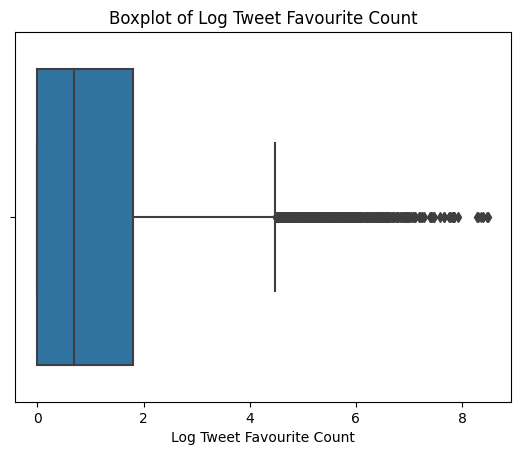

In [ ]:
# Plot the boxplot of log favourite count
sns.boxplot(x = 'log_favourite_count', data = train_raw)
plt.xlabel('Log Tweet Favourite Count')
plt.title('Boxplot of Log Tweet Favourite Count')
plt.show()

In [ ]:
# check the zeros of tweet retweet
train_raw[(train_raw["tweet_retweet_count"] == 0) & (train_raw["tweet_favourite_count"] == 0)].tweet_text

0       The priority for the city should be on providi...
1       Like it or not, this kind of clip is the sort ...
2       On a scale of moderately conservative (1) to r...
3       Keep up with the latest politics with The Dail...
4       So much resemblance to NAZI Germany leading up...
                              ...                        
9981    @ 3:30 in @HoCCommittees - #PACP meets re: Rep...
9982    Watch our latest episode on YouTube here:\n\n@...
9983    @JustinTrudeau whispering to @POTUS:\n\n"That ...
9987    Nothing but non-answers from the Liberal gover...
9999    Things are not getting any better for the Libe...
Name: tweet_text, Length: 3728, dtype: object

In [ ]:
# check the zeros of tweet retweet
train_raw[(train_raw["tweet_retweet_count"] == 0) & (train_raw["tweet_favourite_count"] == 0)].count()

Unnamed: 0               3728
tweet_text               3728
tweet_favourite_count    3728
tweet_created_at         3728
tweet_retweet_count      3728
user_statuses_count      3728
user_screen_name         3728
user_followers_count     3728
log_retweet_count        3728
log_favourite_count      3728
dtype: int64

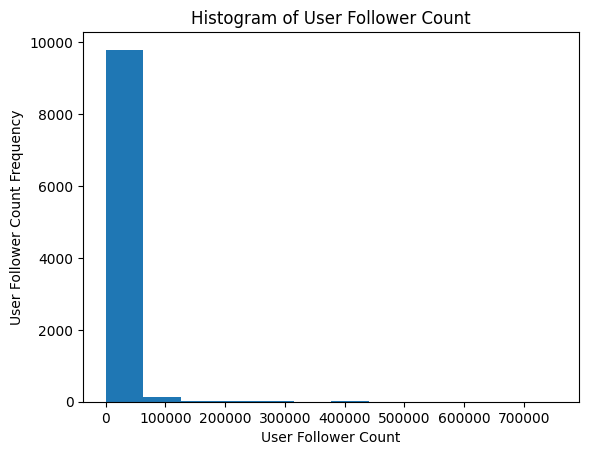

In [ ]:
# Plot histogram of user followers count
plt.hist(train_raw.user_followers_count, bins = 12)
plt.title('Histogram of User Follower Count')
plt.xlabel('User Follower Count')
plt.ylabel('User Follower Count Frequency')
plt.show()

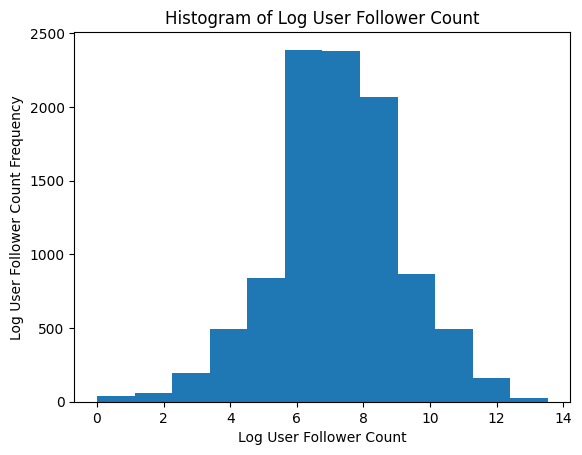

In [ ]:
# Since the histogram above is highly skewed, we take the log to better visualize
# the distribution
train_raw["log_followers_count"] = np.log(train_raw.user_followers_count+1)
# Plot histogram of log followers count
plt.hist(train_raw.log_followers_count, bins = 12)
plt.title('Histogram of Log User Follower Count')
plt.xlabel('Log User Follower Count')
plt.ylabel('Log User Follower Count Frequency')
plt.show()

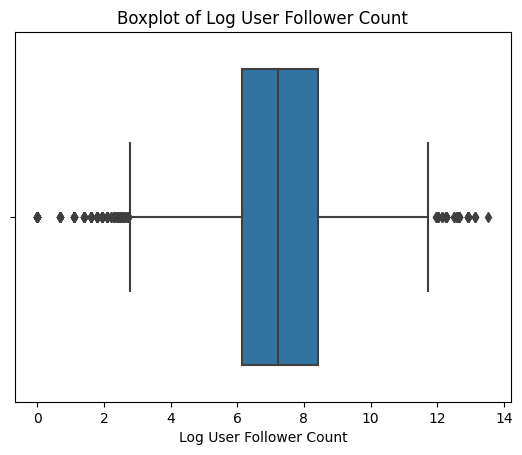

In [ ]:
# Plot the boxplot of log followers count
sns.boxplot(x = 'log_followers_count', data = train_raw)
plt.xlabel('Log User Follower Count')
plt.title('Boxplot of Log User Follower Count')
plt.show()

In [ ]:
# Function for calculating the outliers
def get_outliers(num_var, df):
  '''Get outliers based on the 1.5*IQR rule.
  Input - num_var: A string representing the v
  variable of interest
  df: The pd df containing the numerical data
  Output: A pd df containing the outlier obs
  '''
  # Capture 1st and 3rd quartiles
  firstquart = df[num_var].quantile(q=0.25)
  thirdquart = df[num_var].quantile(q=0.75)

  # Generate IQR
  iqr = thirdquart - firstquart

  # Generate the boundary for an outlier (ie. the whiskers of the plot)
  lower_whisker = firstquart - 1.5*iqr
  upper_whisker = thirdquart + 1.5*iqr

  # Gen outlier df
  outliers = df[(df[num_var] > upper_whisker) | (df[num_var] < lower_whisker)]
  print('The variable {} has {} outliers'.format(num_var, len(outliers)))

In [ ]:
# Get the number of outliers for retweet, favourite and follower counts
get_outliers('tweet_retweet_count', train_raw)
get_outliers('log_retweet_count', train_raw)
get_outliers('tweet_favourite_count', train_raw)
get_outliers('log_favourite_count', train_raw)
get_outliers('user_followers_count', train_raw)
get_outliers('log_followers_count', train_raw)

The variable tweet_retweet_count has 1926 outliers
The variable log_retweet_count has 1400 outliers
The variable tweet_favourite_count has 1582 outliers
The variable log_favourite_count has 454 outliers
The variable user_followers_count has 1267 outliers
The variable log_followers_count has 229 outliers


# Section 2: Tokenization and modeling functions

This section contains the function needed to tokenize the tweet contents and create Naive Bayes models.

In [ ]:
# Remove punctuations and convert all characters to lower case in column "tokens"
def remove_punc_lower(df):
  tokens_no_punct_lower = []
  # Create a list of lists with what we want (i.e., tokens without punctuations)
  for row in df['tokens']:
    tokens_no_punct_lower.append([re.sub('[^\w\s]','', t.lower()) for t in row])
  # add the new info to our df
  df['tokens'] = tokens_no_punct_lower
  return df

In [ ]:
# Remove stopwords in column "token" of the dataset df
def remove_stopwords(df):
  # The first 100 stopwords
  sw = stopwords.words('english')
  # sw = stopwords.words('english')[:100]
  # Now let's remove them
  tokens_no_sw = []
  for row in df['tokens']:
    tokens_no_sw.append([w for w in row if w not in sw])
  # Add column to df
  df['tokens'] = tokens_no_sw
  return df

In [ ]:
# Remove any blank tokens
def remove_blank_tokens(df):
  no_blanks = []
  for row in df['tokens']:
    no_blanks.append([t for t in row if t != ''])
  df['tokens'] = no_blanks
  return df

In [ ]:
# This function is used to tokenize and vectorize the tweets
def tokenize_vectorize_tweet(df_raw):
  df = df_raw

  space_tokenizer = nltk.tokenize.WhitespaceTokenizer()
  # Create a new column in our dataset that contains token lists instead of raw text
  df['tokens'] = df['tweet_text'].apply(space_tokenizer.tokenize)
  # Define an url pattern
  url_pattern = re.compile(r'^http.*')
  # For each token, keep it if it doesn't match the url pattern
  df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if not url_pattern.match(token)])
  # Remove punctuations
  df = remove_punc_lower(df)
  # We are using the Porter Stemmer
  stemmer = PorterStemmer()
  df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
  # Remove the stopwords
  df = remove_stopwords(df)
  # Remove the blank tokens
  df = remove_blank_tokens(df)

  # Vectorize the tokens
  X, y = df['tokens'].to_numpy(), df['label'].to_numpy()

  def override_fcn(doc):
  # We expect a list of tokens as input
    return doc

  # Count Vectorizer
  count_vec = CountVectorizer(
      analyzer='word',
      tokenizer= override_fcn,
      preprocessor= override_fcn,
      token_pattern= None,
      max_features = 15000
      )

  X = count_vec.fit_transform(X)

  return X, y, count_vec

In [ ]:
# This function splits the dataset into training, validation and testing
def split_dataset(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state = 44)
  return X_train, X_test, X_validation, y_train, y_test, y_validation

# This function is to fit a Naive Bayes model with Laplace smoothing
def fit_model(X_train, y_train):
  # Fit a Naive Bayes model with Laplace smoothing
  nb = MultinomialNB(alpha=1)
  # Fit model to training data
  nb.fit(X_train, y_train)
  return nb

# This function is to evaluate the model nb with given X and y
def evaluate_model(X, y, nb):
  # Predict using the model
  preds = nb.predict(X)
  # Calculate the error
  print('Accuracy with simple Naive Bayes:',accuracy_score(y,preds))

  # Calculate the proportion of y
  class_0 = np.sum((y==0).astype(int))
  class_1 = np.sum((y==1).astype(int))
  class_2 = np.sum((y==2).astype(int))
  # Proportion of each class in the dataset
  total = class_0 + class_1 + class_2


  # Calculate the confusion matrix of validation
  con_m = confusion_matrix(y, preds)
  # Visualizing the confusion matrix
  con_m_df = pd.DataFrame(con_m,
                          index = ['Not Popular','Popular','Very Popular'],
                          columns = ['Not Popular','Popular','Very Popular'])
  plt.figure(figsize=(5,4))
  sns.heatmap(con_m_df, annot=True)
  plt.title('Confusion Matrix')
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  plt.show()
  print("Confusion Matrix: ")
  print(con_m)
  # Precision of class 0
  print("Precision of class 0: ")
  print(con_m[0, 0] / (con_m[1, 0] + con_m[2, 0] + con_m[0, 0]))
  print("proportion of class 0: ")
  print(class_0 / total)
  # Precision of class 1
  print("Precision of class 1: ")
  print(con_m[1, 1] / (con_m[1, 1] + con_m[0,1] + con_m[2, 1]))
  print("proportion of class 1: ")
  print(class_1 / total)
  # Precision of class 2
  print("Precision of class 2: ")
  print(con_m[2, 2] / (con_m[1, 2] + con_m[0,2] + con_m[2, 2]))
  print("proportion of class 2: ")
  print(class_2 / total)

#Section 3: Tuning Labeling Threshold

In this section, we will tune the labeling threshold using validation data.


In [ ]:
train = train_raw
# Since we will be dividing by the user_followers_count, check whether there are
# users with no followers to avoid divide by zero error
print("Number of data with zero follower: ")
print(train_raw[train_raw.user_followers_count == 0].count())
# If a user has no follower, assume they have 1 follower to avoid divide by zero error
train.user_followers_count = train_raw.user_followers_count.replace(0, 1)

Number of data with zero follower: 
Unnamed: 0               21
tweet_text               21
tweet_favourite_count    21
tweet_created_at         21
tweet_retweet_count      21
user_statuses_count      21
user_screen_name         21
user_followers_count     21
log_retweet_count        21
log_favourite_count      21
log_followers_count      21
dtype: int64


In [ ]:
# Calculate the popularity level of each tweet
# Multiply the popularity level by 10 to scale the data for easy analysis
train["popularity"] = 10*(train.tweet_favourite_count + train.tweet_retweet_count)/train.user_followers_count

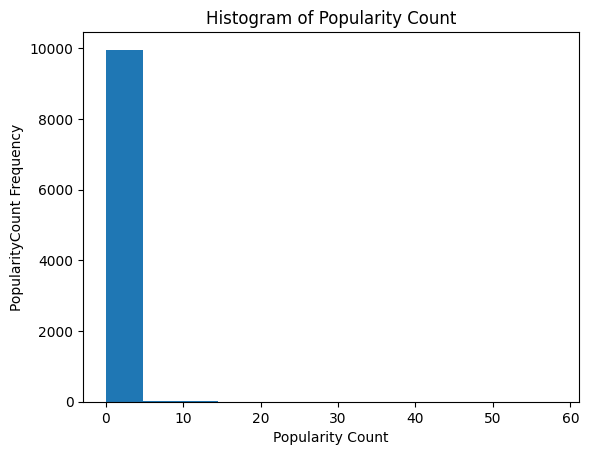

In [ ]:
# Plot histogram of popularity count
plt.hist(train.popularity, bins = 12)
plt.title('Histogram of Popularity Count')
plt.xlabel('Popularity Count')
plt.ylabel('PopularityCount Frequency')
plt.show()

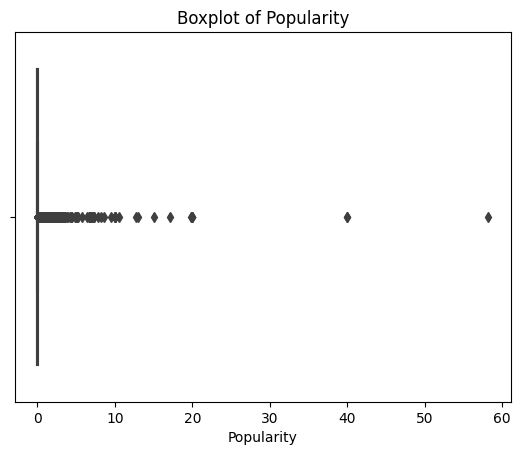

In [ ]:
# Plot boxplot of popularity
import seaborn as sns
sns.boxplot(x = 'popularity', data = train)
plt.xlabel('Popularity')
plt.title('Boxplot of Popularity')
plt.show()

In [ ]:
# Plot the pairwise-graph of the columns
# sns.pairplot(train[["popularity", "user_followers_count", 'tweet_retweet_count','tweet_favourite_count' ]])
# plt.show()

In [ ]:
# add a column as popularity label
def label_popularity (row):
   if row['label'] == 0 :
      return "Not popular"
   if row['label'] == 1 :
      return "Popular"
   if row['label'] == 2 :
      return "Very popular"
   return 'Other'

In [ ]:
# Function to preprocess the data, it assigns label 0, 1 or 2 to each tweet
# according to their popularity score.
def preprocessing(df, threshold):
    # Create a copy of the dataframe to avoid modifying the original dataframe in place
    preprocessed_df = df.copy()

    preprocessed_df.loc[preprocessed_df['popularity']==0, 'label'] = 0
    preprocessed_df.loc[(preprocessed_df['popularity'] >0) & (preprocessed_df['popularity'] <threshold) , 'label'] = 1
    preprocessed_df.loc[preprocessed_df['popularity']>=threshold, 'label'] = 2

    # Remove rows where the label column is missing or not an integer
    preprocessed_df = preprocessed_df.dropna(subset=['label'])
    preprocessed_df['label'] = preprocessed_df['label'].astype(int)

    preprocessed_df['label_meaning'] = preprocessed_df.apply (lambda row: label_popularity(row), axis=1)

    # Return the preprocessed dataframe
    return preprocessed_df

In [ ]:
# Count of each class in the dataset
def class_proportion(df):
  class_counts = df['label'].value_counts()
  print(class_counts)

  # Proportion of each class in the dataset
  total = class_counts[0] + class_counts[1] + class_counts[2]
  for i in range(3):
    prop = class_counts[i] / total
    print("proportion for label {} is: {}".format(i, prop))

In [ ]:
# Bar graph of class counts
def graph_class_counts(df, threshold):
  # df['label_meaning'].value_counts().plot(kind = 'bar')
  # plt.xlabel('')
  values = df['label_meaning'].value_counts()

  class_names = ["Not popular", "Popular", "Very Popular"]
  counts = [values["Not popular"], values["Popular"], values["Very popular"]]

  plt.bar(class_names, counts, width=0.4)

  plt.ylabel('Count')
  plt.title("Histogram of Label Value Count for Threshold {}".format(threshold))
  plt.show()

1    5373
0    3728
2     899
Name: label, dtype: int64
proportion for label 0 is: 0.3728
proportion for label 1 is: 0.5373
proportion for label 2 is: 0.0899


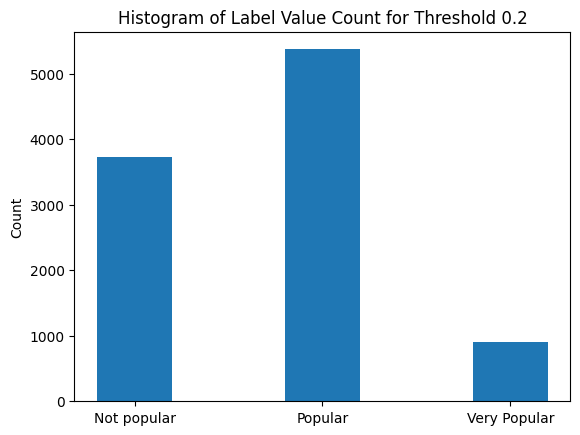

In [ ]:
# Tokenize and vectorize the tweets + fit a Naive Bayes Model with threshold = 0.2
# Call the preprocessing function to label the training, testing and validation data
train_threshold1 = preprocessing(train, 0.2)
# Print the count and proportion of each class
class_proportion(train_threshold1)
# Plot bar graph of class count
graph_class_counts(train_threshold1, 0.2)

Below are the evaluation using training set with threshold = 0.2: 
Accuracy with simple Naive Bayes: 0.804875


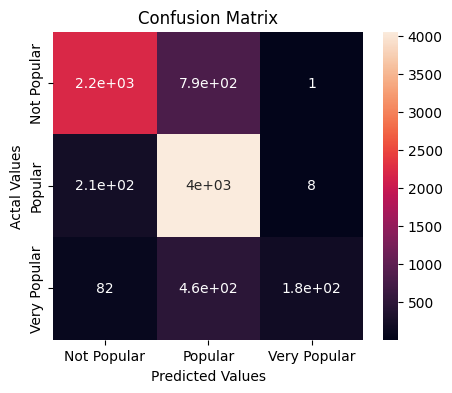

Confusion Matrix: 
[[2211  794    1]
 [ 214 4050    8]
 [  82  462  178]]
Precision of class 0: 
0.8819305943358596
proportion of class 0: 
0.37575
Precision of class 1: 
0.7632868450810403
proportion of class 1: 
0.534
Precision of class 2: 
0.9518716577540107
proportion of class 2: 
0.09025
Below are the evaluation using validation set with threshold = 0.2: 
Accuracy with simple Naive Bayes: 0.567


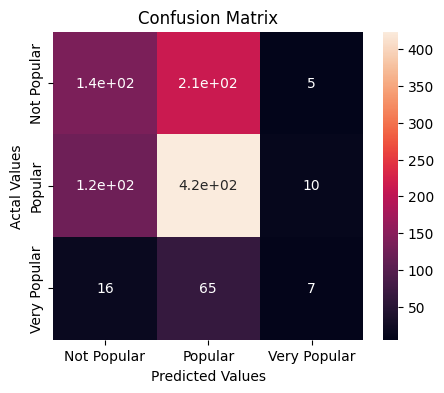

Confusion Matrix: 
[[136 214   5]
 [123 424  10]
 [ 16  65   7]]
Precision of class 0: 
0.49454545454545457
proportion of class 0: 
0.355
Precision of class 1: 
0.6031294452347084
proportion of class 1: 
0.557
Precision of class 2: 
0.3181818181818182
proportion of class 2: 
0.088


In [ ]:
# Fit and evaluate the model when the threshold is set to 0.2
X1, y1, count_vec1 = tokenize_vectorize_tweet(train_threshold1)
X_train1, X_test1, X_validation1, y_train1, y_test1, y_validation1 = split_dataset(X1, y1)
nb1 = fit_model(X_train1, y_train1)
print("Below are the evaluation using training set with threshold = 0.2: ")
evaluate_model(X_train1, y_train1, nb1)
print("Below are the evaluation using validation set with threshold = 0.2: ")
evaluate_model(X_validation1, y_validation1, nb1)

1    5895
0    3728
2     377
Name: label, dtype: int64
proportion for label 0 is: 0.3728
proportion for label 1 is: 0.5895
proportion for label 2 is: 0.0377


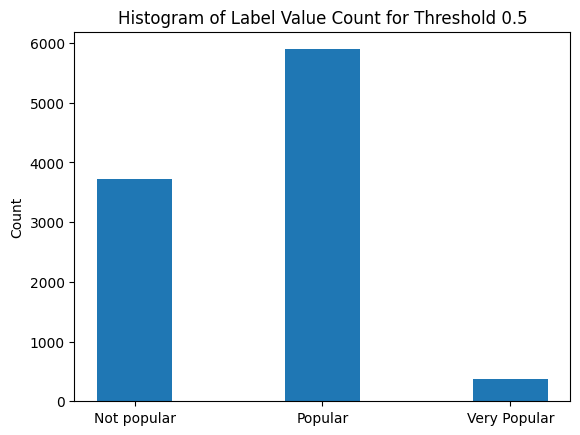

In [ ]:
# Tokenize and vectorize the tweets + fit a Naive Bayes Model with threshold = 0.5
# Call the preprocessing function to label the training, testing and validation data
train_threshold2 = preprocessing(train, 0.5)
# Print the count and proportion of each class
class_proportion(train_threshold2)
# Plot bar graph of class count
graph_class_counts(train_threshold2, 0.5)

Below are the evaluation using training set with threshold = 0.5: 
Accuracy with simple Naive Bayes: 0.829125


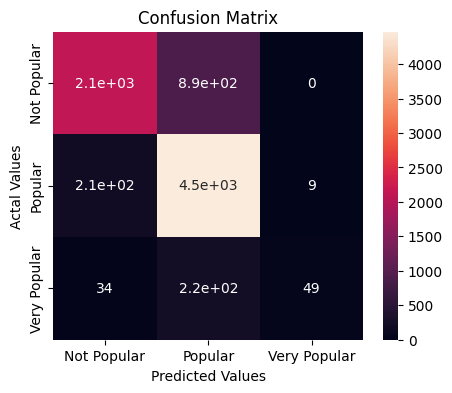

Confusion Matrix: 
[[2115  891    0]
 [ 208 4469    9]
 [  34  225   49]]
Precision of class 0: 
0.8973271107339839
proportion of class 0: 
0.37575
Precision of class 1: 
0.8001790510295435
proportion of class 1: 
0.58575
Precision of class 2: 
0.8448275862068966
proportion of class 2: 
0.0385
Below are the evaluation using validation set with threshold = 0.5: 
Accuracy with simple Naive Bayes: 0.611


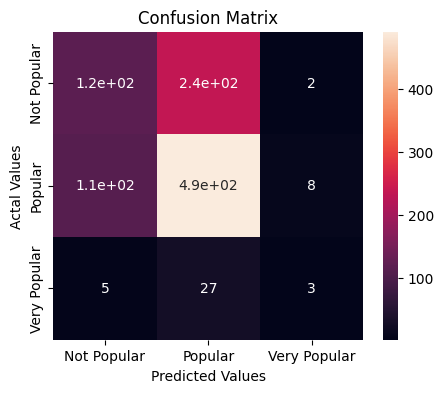

Confusion Matrix: 
[[118 235   2]
 [112 490   8]
 [  5  27   3]]
Precision of class 0: 
0.502127659574468
proportion of class 0: 
0.355
Precision of class 1: 
0.651595744680851
proportion of class 1: 
0.61
Precision of class 2: 
0.23076923076923078
proportion of class 2: 
0.035


In [ ]:
# Fit and evaluate the model when the threshold is set to 0.5
X2, y2, count_vec2 = tokenize_vectorize_tweet(train_threshold2)
X_train2, X_test2, X_validation2, y_train2, y_test2, y_validation2 = split_dataset(X2, y2)
nb2 = fit_model(X_train2, y_train2)
print("Below are the evaluation using training set with threshold = 0.5: ")
evaluate_model(X_train2, y_train2, nb2)
print("Below are the evaluation using validation set with threshold = 0.5: ")
evaluate_model(X_validation2, y_validation2, nb2)

1    6071
0    3728
2     201
Name: label, dtype: int64
proportion for label 0 is: 0.3728
proportion for label 1 is: 0.6071
proportion for label 2 is: 0.0201


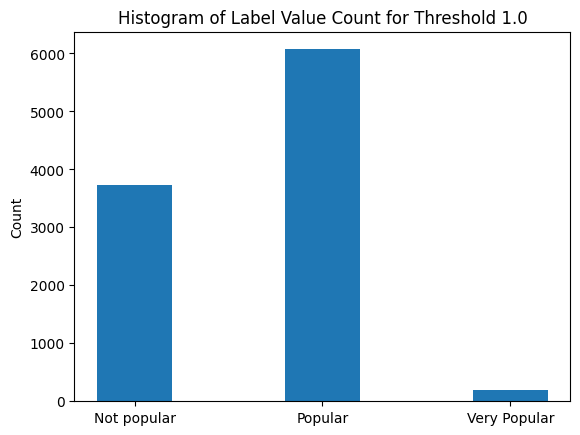

In [ ]:
# Tokenize and vectorize the tweets + fit a Naive Bayes Model with threshold = 1
# Call the preprocessing function to label the training, testing and validation data
train_threshold3 = preprocessing(train, 1)
# Print the count and proportion of each class
class_proportion(train_threshold3)
# Plot bar graph of class count
graph_class_counts(train_threshold3, 1.0)

Below are the evaluation using training set with threshold = 1: 
Accuracy with simple Naive Bayes: 0.842125


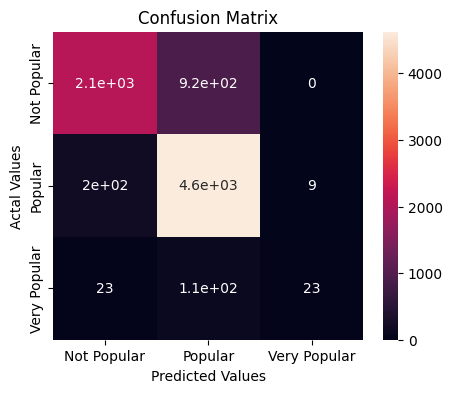

Confusion Matrix: 
[[2089  917    0]
 [ 200 4625    9]
 [  23  114   23]]
Precision of class 0: 
0.9035467128027682
proportion of class 0: 
0.37575
Precision of class 1: 
0.8177157001414427
proportion of class 1: 
0.60425
Precision of class 2: 
0.71875
proportion of class 2: 
0.02
Below are the evaluation using validation set with threshold = 1: 
Accuracy with simple Naive Bayes: 0.623


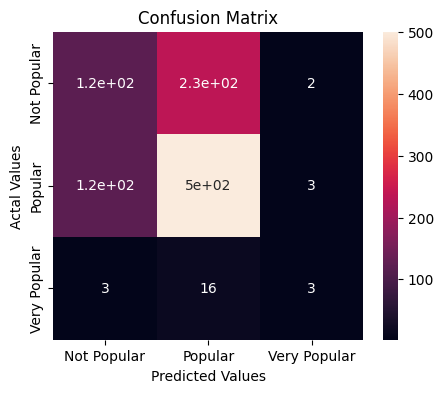

Confusion Matrix: 
[[119 234   2]
 [119 501   3]
 [  3  16   3]]
Precision of class 0: 
0.49377593360995853
proportion of class 0: 
0.355
Precision of class 1: 
0.6671105193075899
proportion of class 1: 
0.623
Precision of class 2: 
0.375
proportion of class 2: 
0.022


In [ ]:
# Fit and evaluate the model when the threshold is set to 1
X3, y3, count_vec3 = tokenize_vectorize_tweet(train_threshold3)
X_train3, X_test3, X_validation3, y_train3, y_test3, y_validation3 = split_dataset(X3, y3)
nb3 = fit_model(X_train3, y_train3)
print("Below are the evaluation using training set with threshold = 1: ")
evaluate_model(X_train3, y_train3, nb3)
print("Below are the evaluation using validation set with threshold = 1: ")
evaluate_model(X_validation3, y_validation3, nb3)

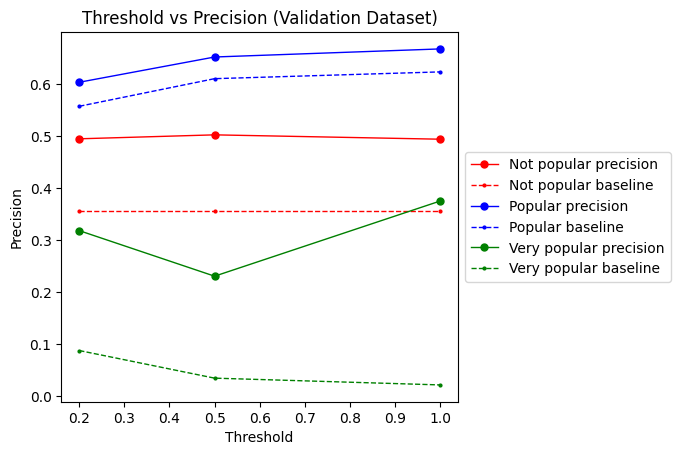

In [ ]:
import matplotlib.pyplot as plt

# threshold and precision for class 0
x = [0.2, 0.5, 1.0]
y1 = [0.49454545454545457, 0.502127659574468, 0.49377593360995853]
# threshold and proportion for class 0

y2 = [0.355, 0.355, 0.355 ]

# threshold and precision for class 1

y3 = [0.6031294452347084, 0.651595744680851, 0.6671105193075899 ]

# threshold and proportion for class 1

y4 = [0.557, 0.61, 0.623]

# threshold and precision for class 2

y5 = [0.3181818181818182,0.23076923076923078, 0.375 ]

# threshold and proportion for class 2

y6 = [0.088, 0.035, 0.022]

fig, ax = plt.subplots()

# plot the threshold vs. precision for class 0
plt.plot(
    x, y1, ls="-", lw=1,
    marker="o", markersize=5, markerfacecolor="red", color="red",
    label="Not popular precision")

# plot the threshold vs. proportion for class 0
plt.plot(
    x, y2, ls="--", lw=1,
    marker="o", markersize=2, markerfacecolor="red", color="red",
    label="Not popular baseline")

# plot the threshold vs. precision for class 1
plt.plot(
    x, y3, ls="-", lw=1,
    marker="o", markersize=5, markerfacecolor="blue", color="blue",
    label="Popular precision")

# plot the threshold vs. proportion for class 1
plt.plot(
    x, y4, ls="--", lw=1,
    marker="o", markersize=2, markerfacecolor="blue", color="blue",
    label="Popular baseline")

# plot the threshold vs. precision for class 2
plt.plot(
    x, y5, ls="-", lw=1,
    marker="o", markersize=5, markerfacecolor="green", color="green",
    label="Very popular precision")

# plot the threshold vs. proportion for class 2
plt.plot(
    x, y6, ls="--", lw=1,
    marker="o", markersize=2, markerfacecolor="green", color="green",
    label="Very popular baseline")


# Set axis labels and title
ax.set_xlabel('Threshold')
ax.set_ylabel('Precision')
ax.set_title('Threshold vs Precision (Validation Dataset)')

# Show the plot
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#Section 4: Final Model

We chose the model with threshold = 0.5 (see justification in report). We will now generate some top keywords using the model.

Accuracy with simple Naive Bayes: 0.631


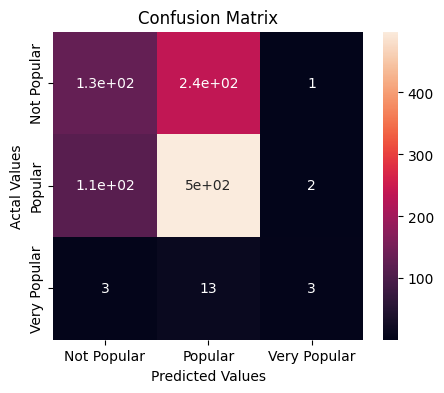

Confusion Matrix: 
[[130 236   1]
 [114 498   2]
 [  3  13   3]]
Precision of class 0: 
0.5263157894736842
proportion of class 0: 
0.367
Precision of class 1: 
0.6666666666666666
proportion of class 1: 
0.614
Precision of class 2: 
0.5
proportion of class 2: 
0.019


In [ ]:
# Evaluate model with threshold = 1.0 using the test data
evaluate_model(X_test3, y_test3, nb3)

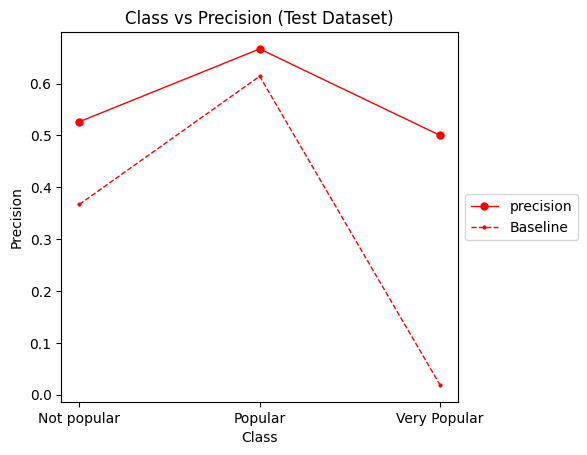

In [ ]:
import matplotlib.pyplot as plt

# class and precision for test dataset
x = ["Not popular", "Popular", "Very Popular"]
y1 = [0.5263157894736842,0.6666666666666666, 0.5 ]
# class and proportion for test dataset
y2 = [0.367, 0.614, 0.019]

fig, ax = plt.subplots()

# plot the threshold vs. precision for class 0
plt.plot(
    x, y1, ls="-", lw=1,
    marker="o", markersize=5, markerfacecolor="red", color="red",
    label="precision")

# plot the threshold vs. proportion for class 0
plt.plot(
    x, y2, ls="--", lw=1,
    marker="o", markersize=2, markerfacecolor="red", color="red",
    label="Baseline")


# Set axis labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Precision')
ax.set_title('Class vs Precision (Test Dataset)')
# ax.set_xticklabels([])

# Show the plot
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
# Get the feature names from the CountVectorizer
feature_names = count_vec3.get_feature_names_out()
# Get the count for each feature in each class
count = nb3.feature_count_

# Get the indices of the top 10 most probable words for each class
class0_idx = np.argsort(count[0])[::-1][:20]
class1_idx = np.argsort(count[1])[::-1][:20]
class2_idx = np.argsort(count[2])[::-1][:20]

# Print the top 20 most probable words for each class and their counts
print('Top 20 words in Popularity 0 class:')
for idx in class0_idx:
    print('\t{} (count: {})'.format(feature_names[idx], count[0][idx]))

print('Top 20 words in Popularity 1 class:')
for idx in class1_idx:
    print('\t{} (count: {})'.format(feature_names[idx], count[1][idx]))

print('Top 20 words in Popularity 2 class:')
for idx in class2_idx:
    print('\t{} (count: {})'.format(feature_names[idx], count[2][idx]))

Top 20 words in Popularity 0 class:
	cdnpoli (count: 1093.0)
	thi (count: 381.0)
	canada (count: 287.0)
	trudeau (count: 214.0)
	canadian (count: 214.0)
	amp (count: 206.0)
	wa (count: 168.0)
	liber (count: 150.0)
	ha (count: 149.0)
	pierrepoilievr (count: 145.0)
	hi (count: 145.0)
	justintrudeau (count: 126.0)
	biden (count: 123.0)
	whi (count: 117.0)
	like (count: 114.0)
	us (count: 112.0)
	get (count: 103.0)
	govern (count: 99.0)
	need (count: 93.0)
	one (count: 92.0)
Top 20 words in Popularity 1 class:
	cdnpoli (count: 1492.0)
	thi (count: 704.0)
	canada (count: 431.0)
	amp (count: 354.0)
	canadian (count: 321.0)
	trudeau (count: 305.0)
	wa (count: 294.0)
	biden (count: 286.0)
	pierrepoilievr (count: 269.0)
	ha (count: 269.0)
	hi (count: 257.0)
	conserv (count: 216.0)
	like (count: 196.0)
	liber (count: 186.0)
	get (count: 180.0)
	whi (count: 174.0)
	us (count: 173.0)
	ð (count: 165.0)
	know (count: 161.0)
	potu (count: 156.0)
Top 20 words in Popularity 2 class:
	cdnpoli (count: 43

<ipython-input-46-d6228a7f95ad>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(popularity_0_words, rotation=90)
<ipython-input-46-d6228a7f95ad>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(popularity_1_words, rotation=90)
<ipython-input-46-d6228a7f95ad>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(popularity_2_words, rotation=90)


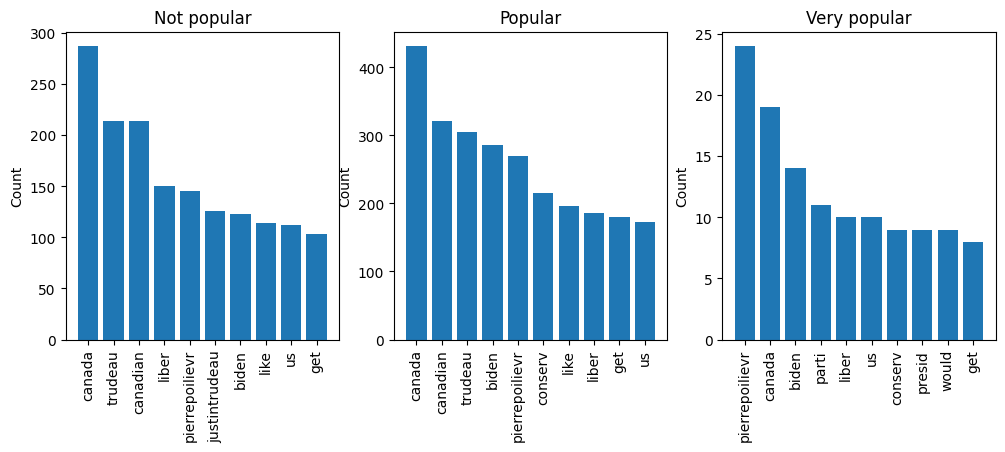

In [ ]:
# This is for printing the bar graphs of most frequent words
# Note we removed certain words that don't make sense e.g, wa, ha
# Set up the data for the three bar graphs
popularity_0_words = ['canada', 'trudeau', 'canadian', 'liber', 'pierrepoilievr', 'justintrudeau', 'biden', 'like', 'us', 'get']
popularity_0_counts = [287.0, 214.0, 214.0, 150.0, 145.0, 126.0, 123.0, 114.0, 112.0, 103.0]

popularity_1_words = ['canada', 'canadian', 'trudeau', 'biden', 'pierrepoilievr', 'conserv', 'like', 'liber', 'get', 'us']
popularity_1_counts = [431.0, 321.0, 305.0, 286.0, 269.0, 216.0, 196.0, 186.0, 180.0, 173.0]

popularity_2_words = ['pierrepoilievr', 'canada', 'biden', 'parti', 'liber', 'us', 'conserv', 'presid', 'would', 'get']
popularity_2_counts = [24.0, 19.0, 14.0, 11.0, 10.0, 10.0, 9.0, 9.0, 9.0, 8.0]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Set the title
ax[0].set_title('Not popular')
ax[1].set_title('Popular')
ax[2].set_title('Very popular')

# Set y-axis label
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Count')

# Set the x-axis tick labels
ax[0].set_xticklabels(popularity_0_words, rotation=90)
ax[1].set_xticklabels(popularity_1_words, rotation=90)
ax[2].set_xticklabels(popularity_2_words, rotation=90)

# Set the data for each subplot
ax[0].bar(popularity_0_words, popularity_0_counts)
ax[1].bar(popularity_1_words, popularity_1_counts)
ax[2].bar(popularity_2_words, popularity_2_counts)


# Show the three bar graphs
plt.show()